<a href="https://colab.research.google.com/github/AdrianaMF45/Practica4Pandas/blob/main/Copia_de_Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### __Data set de vinos del mundo__

Esta es una versión reducida de la base de datos [winemag-data](https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129), que contiene una reseña en inglés sobre una gran cantidad de vinos del mundo.

### __Descripción de los campos__

 - **country**: El país de donde proviene el vino
 - **description** : Algunas frases de un sommelier que describen el sabor, olor, apariencia, sensación, etc. del vino.
 - **designation**: La denominación. El viñedo dentro de la bodega de donde proceden las uvas que elaboraron el vino.
 - **points**: la cantidad de puntos que WineEnthusiast calificó al vino en una escala del 1 al 100 (aunque dicen que solo publican reseñas de vinos con una puntuación> = 80).
 - **price**: El costo de una botella de vino.
 - **province**: La provincia o estado de donde proviene el vino
 - **region_1**: el área de cultivo de vino en una provincia o estado (es decir, Napa)
 - **region_2**: a veces hay regiones más específicas, especificadas dentro de un área de cultivo del vino (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
 - **taster_name**: nombre de la persona que probó y revisó el vino.
 - **taster_twitter_handle**: identificador de Twitter para la persona que probó y revisó el vino.
 - **title**: el título de la reseña de vinos, que a menudo contiene la cosecha si está interesado en extraer esa característica.
 - **variety**: la variedad: el tipo de uva utilizada para elaborar el vino (es decir, Pinot Noir).
 - **winery**: la bodega que hizo el vino.

### TEST

In [4]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.2M  100 23.2M    0     0  35.4M      0 --:--:-- --:--:-- --:--:-- 35.5M


In [3]:
# leemos el dataframe usando read_csv
df = pd.read_csv("winemag-data-less.csv")
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59995 non-null  int64  
 1   country                59964 non-null  object 
 2   description            59995 non-null  object 
 3   designation            42728 non-null  object 
 4   points                 59995 non-null  int64  
 5   price                  55750 non-null  float64
 6   province               59964 non-null  object 
 7   region_1               50163 non-null  object 
 8   region_2               23068 non-null  object 
 9   taster_name            47586 non-null  object 
 10  taster_twitter_handle  45381 non-null  object 
 11  title                  59995 non-null  object 
 12  variety                59995 non-null  object 
 13  winery                 59995 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [5]:
#Tiremos la columna Unnamed
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### __Veamos cuantas reseñas de vinos mexicanos tenemos.__

#### &#9758; Construye una nueva Tabla con las reseñas de vinos mexicanos.
- Quédate **sólo** con las siguientes columnas: `['country','winery','variety','description','points','price']`
- Haz que el índice se reinicie en 0.
- Guarda este DataFrame en la variable vinosMX.

In [17]:
vinosMX = df[df['country'] == 'Mexico']
vinosMX = vinosMX[['country', 'winery', 'variety', 'description', 'points', 'price']]
vinosMX = vinosMX.reset_index(drop=True)
vinosMX


,country,winery,variety,description,points,price
0,Mexico,L.A. Cetto,Nebbiolo,"The color is appropriately light, the aromas a...",88,18.0
1,Mexico,Monte Xanic,Sauvignon Blanc,"Sauvignon Blanc is, in general, one of Baja's ...",87,15.0
2,Mexico,L.A. Cetto,Cabernet Sauvignon,"Aromas of mature Cabernet: cassis, tobacco lea...",87,18.0
3,Mexico,Cava Aragon,Nebbiolo,"While this is fiery on the nose, you also get ...",88,27.0
4,Mexico,L.A. Cetto,Petite Sirah,"Dark and earthy, slightly pruny and alcoholic,...",83,8.0
5,Mexico,Hacienda La Lomita,Rosé,Oxidized cherry and strawberry aromas settle o...,83,21.0
6,Mexico,Monte Xanic,Cabernet Franc,"With aromas of salsa, chili peppers and tomato...",86,39.0
7,Mexico,Tres Valles,Sauvignon Blanc,Mild hints of tropical fruit are less than con...,84,15.0
8,Mexico,Unión de Productores del Valle (UPVG),Red Blend,"This odd blend of Barbera, Cabernet Sauvignon,...",83,22.0
9,Mexico,Monte Xanic,Red Blend,This Cabernet blend is one of Baja's best reds...,90,56.0


### __Veamos cuantas reseñas de vinos por país tenemos.__

#### &#9758; Muestra en una gráfica de barras la distribución del número de reseñas por país (_top 10_).

#### Puedes auxiliarte con alguna de estos métodos de Pandas:
 - [pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
 - [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
 - [pandas.Series.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
 - [pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html)

<ipython-input-27-104b00741b5b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x[:10], y=y[:10], palette=colores)
<ipython-input-27-104b00741b5b>:15: UserWarning: The palette list has more values (41) than needed (10), which may not be intended.
  sns.barplot(x=x[:10], y=y[:10], palette=colores)


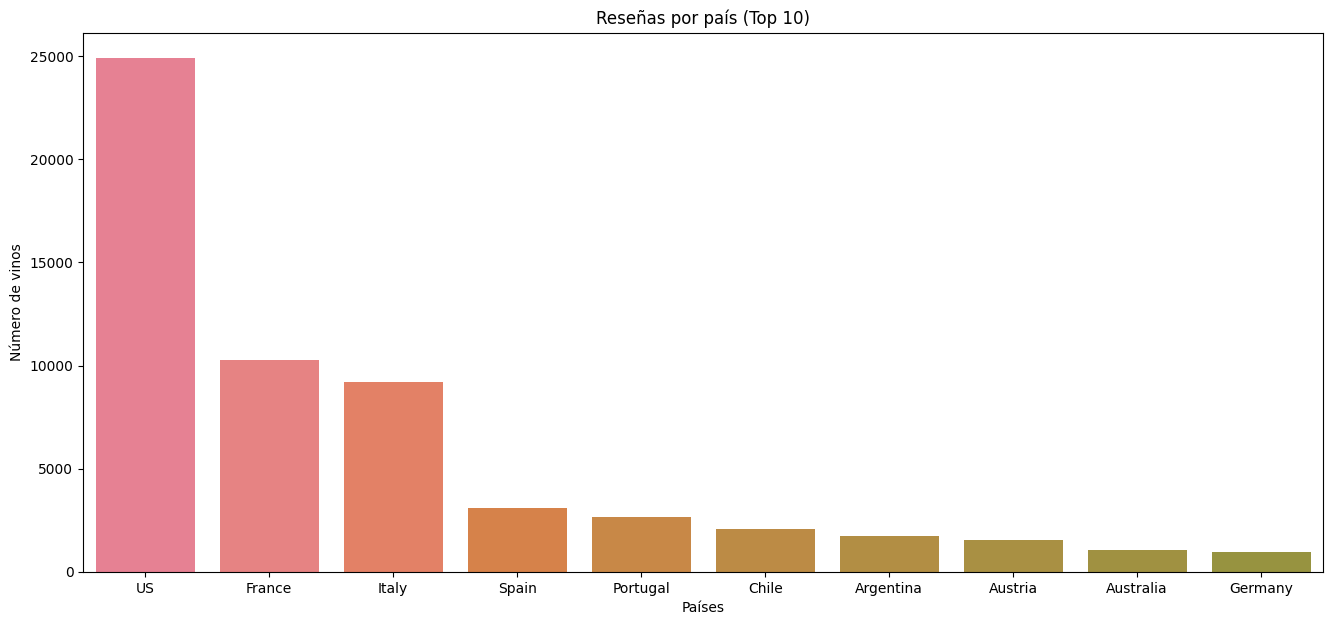

In [27]:
# 1. Ubicar el nombre de la columna de país
# 2. Sobre esta columna, obtener la Serie correspondiente
# 3. Hacer un conteo de los valores únicos sobre esta Serie
conteos = df['country'].value_counts()

# 4. X en la gráfica de barras son los países (índice de la Serie)
# 5. Y en la gráfica de barras son los conteos por país (values de la Serie)
x = conteos.index
y = conteos.values

# Seleccionar una paleta de colores única para cada país
colores = sns.color_palette("husl", len(x))

plt.figure(figsize=(16, 7))
sns.barplot(x=x[:10], y=y[:10], palette=colores)

plt.xlabel("Países")
plt.ylabel("Número de vinos")
plt.title("Reseñas por país (Top 10)")

plt.show()


### __Veamos ahora cuál es el precio promedio por cada país.__

#### &#9758; Muestra en una gráfica de barras el precio promedio por país, en orden descendente (_top 10_).

Puedes consultar:
 - [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

#### &#9758; ¿Cuál sería el precio promedio por variedad?

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

<ipython-input-24-e6a8cda71c21>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedios.index, y=promedios.values, palette=colores)


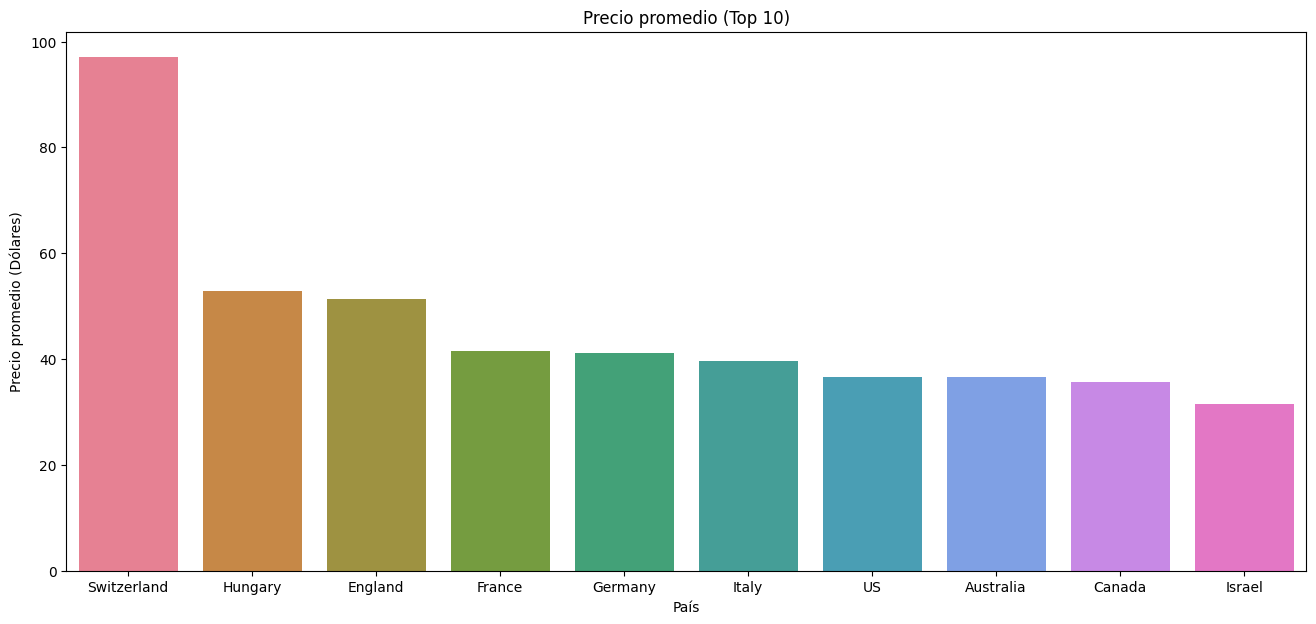

In [24]:
# 1. Agrupar el DataFrame por la columna 'country'
# 2. Calcular el precio promedio para cada país
promedios = df.groupby('country')['price'].mean()

# 3. Ordenar los resultados en orden descendente
promedios = promedios.sort_values(ascending=False)

# 4. Tomar los primeros 10 resultados
promedios = promedios.head(10)

# Seleccionar una paleta de colores
colores = sns.color_palette("husl", len(promedios))

# Graficar los resultados
plt.figure(figsize=(16,7))
sns.barplot(x=promedios.index, y=promedios.values, palette=colores)
plt.xlabel("País")
plt.ylabel("Precio promedio (Dólares)")
plt.title("Precio promedio (Top 10)")
plt.show()

#### Agregando anotaciones a nuestros gráficos

Es posible agregar información a nuestros gráficos, en forma de texto, o dibujos (e.g. flechas, líneas, círculos, etc.). Para ello, se utiliza la anotación (annotate) de ejes (axes). Detallar aquí cómo funciona nos llevaría mucho tiempo. Puedes consultar la documentación en estas ligas:

- [matplotlib.Artist](https://matplotlib.org/3.3.3/api/artist_api.html#matplotlib.artist.Artist)
    - [Artist tutorial](https://matplotlib.org/3.3.3/tutorials/intermediate/artists.html)
- [matplotlib.axes](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Patch](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Rectangle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.pyplot.annotate](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html)

<ipython-input-32-c47710a0cc3e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x, y=y, palette=colores)


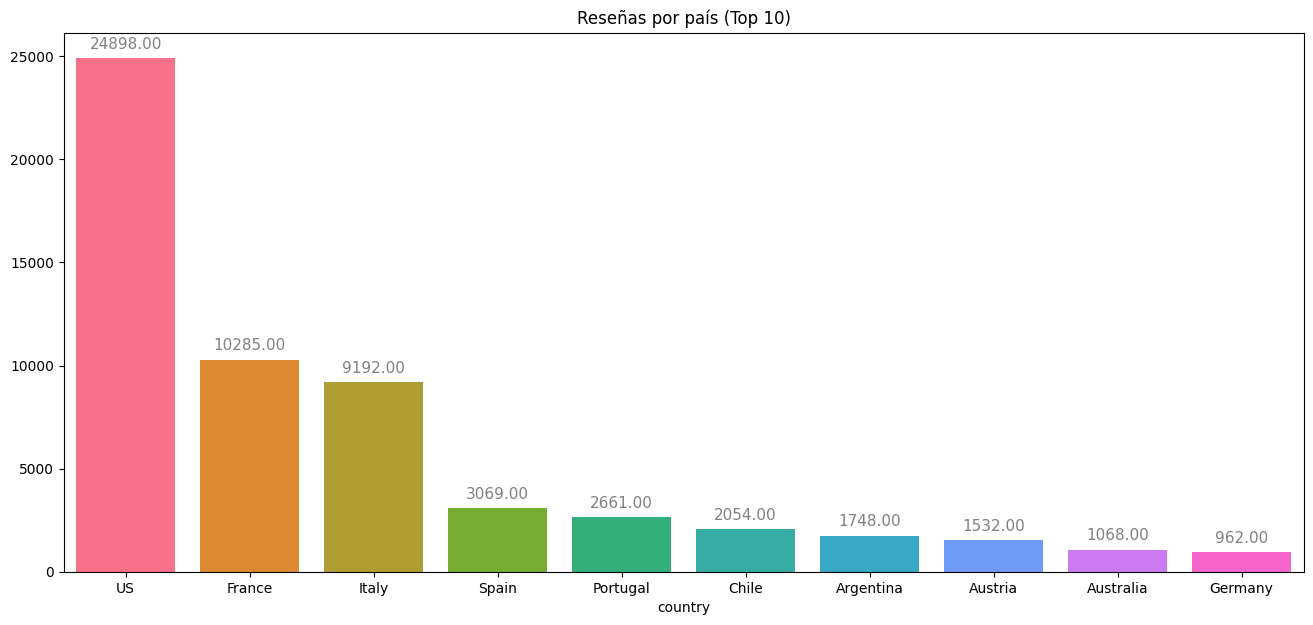

In [32]:
# Definimos los datos
x = conteos.index[:10]
y = conteos.values[:10]

colores = sns.color_palette("husl", len(x))

# Definimos el tamaño del canvas
plt.figure(figsize=(16,7))
ax = sns.barplot(x=x, y=y, palette=colores)

# Recorremos cada rectángulo
for p, color in zip(ax.patches, colores):
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=11, color='gray',\
                xytext=(0, 10),\
                textcoords='offset points')
    p.set_facecolor(color)  # Establecer el color de cada barra

plt.title("Reseñas por país (Top 10)")

plt.show()


### __Ahora queremos darnos una idea de cuáles podrían ser los países cuyos vinos tienen una mejor razón calidad-precio en promedio.__

#### &#9758; Muestra en una gráfica de barras la razón puntos/precio promedio por país, en orden descendente (_top 10_). Muestra los valores de la razón sobre cada barra.

✋ __Recuerda que si divides entre 0 o Nan obtendrás inf o nan__

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

<ipython-input-35-46a9b2f0c53c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.points, palette='Purples')


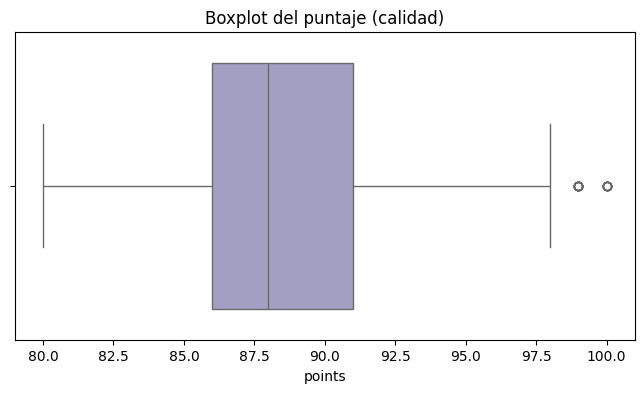

In [35]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df.points, palette='Purples')
plt.title("Boxplot del puntaje (calidad)")
plt.show()


<ipython-input-54-c03611313deb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_razon_calidad_precio.index, y=top_10_razon_calidad_precio.values, palette='Purples')


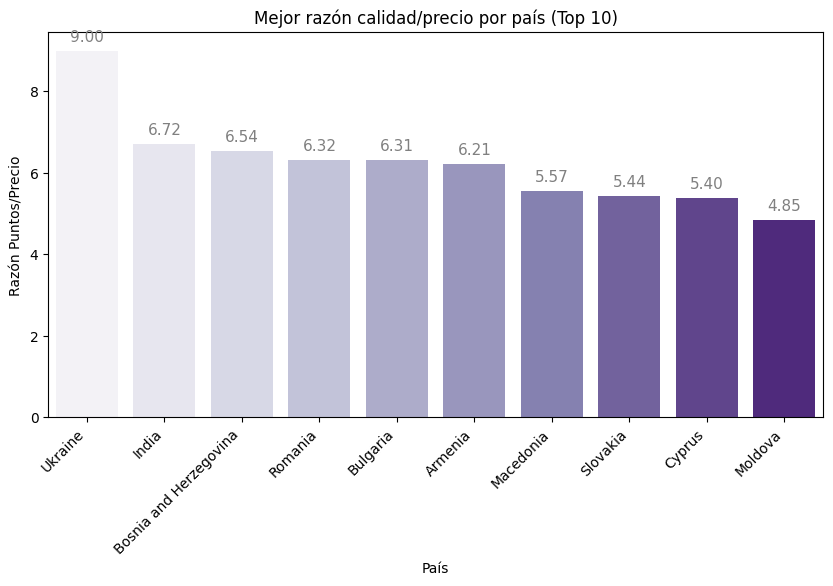

In [54]:
plt.figure(figsize=(10,5))
precio_prom_pais = df.groupby('country')['price'].mean()
puntos_prom_pais = df.groupby('country')['points'].mean()
razon_calidad_precio = puntos_prom_pais / precio_prom_pais
razon_calidad_precio = razon_calidad_precio.sort_values(ascending=False)
top_10_razon_calidad_precio = razon_calidad_precio.head(10)
ax = sns.barplot(x=top_10_razon_calidad_precio.index, y=top_10_razon_calidad_precio.values, palette='Purples')

plt.title("Mejor razón calidad/precio por país (Top 10)")
plt.xlabel("País")
plt.xticks(rotation= 45, ha="right")
plt.ylabel("Razón Puntos/Precio")

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')
plt.show()


### __¿Qué vinos tienen la mejor puntuación y a qué países pertenecen?__

#### &#9758; Muestra en una gráfica de pastel la proporción de los países que tienen los 20 mejores vinos; es decir, los primeros 20 de mayor puntaje.  

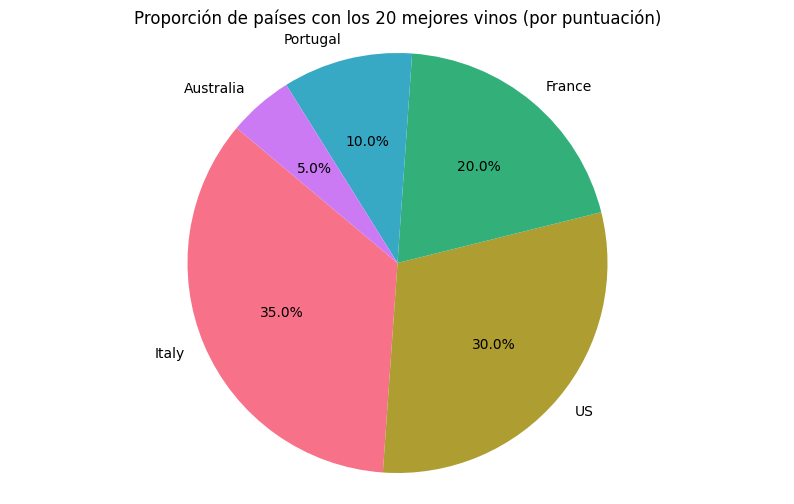

In [52]:
df_sorted = df.sort_values(by='points', ascending=False)
top20_vinos = df_sorted.head(20)
top_paises = top20_vinos['country'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(top_paises, labels=top_paises.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", len(top_countries)))
plt.title('Proporción de países con los 20 mejores vinos (por puntuación)')
plt.axis('equal')
plt.show()


### __¿Cuáles son las 10 variedades de uva más abundantes y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [55]:
top_10_variedades = df['variety'].value_counts().head(10)
print(top_10_variedades)

variety
Pinot Noir                  6096
Chardonnay                  5343
Cabernet Sauvignon          4353
Red Blend                   4179
Bordeaux-style Red Blend    3164
Riesling                    2406
Sauvignon Blanc             2344
Syrah                       1900
Rosé                        1590
Merlot                      1412
Name: count, dtype: int64


### __¿Cuáles son las 20 bodegas más mencionadas y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [56]:
top20_bodegas = df['winery'].value_counts().head(20)
print(top20_bodegas)

winery
Georges Duboeuf               109
Wines & Winemakers            107
Testarossa                     97
Louis Latour                   87
Chateau Ste. Michelle          86
Williams Selyem                86
DFJ Vinhos                     86
Concha y Toro                  78
Gary Farrell                   74
Lynmar                         72
Kendall-Jackson                68
Robert Mondavi                 65
Columbia Crest                 57
Trapiche                       57
Undurraga                      56
Siduri                         55
Albert Bichot                  55
Jean-Luc and Paul Aegerter     53
Casa Santos Lima               53
Rodney Strong                  53
Name: count, dtype: int64


### __Vamos ahora a construir una nueva tabla de información__

#### &#9758; Construye una tabla que muestre país, variedad de uva, bodega, y valores de puntuación y precio.
- Considera las 10 variedades de uva y las 20 bodegas más importantes.
- Haz una tabla con estos datos y sólo los valores de país, bodega, variedad, puntuación y precio correspondientes.
- Agrega una columna con el valor de puntos/precio
- Cambia el nombre de la bodega para que éste incluya su país de origen.
- Ordena los datos por nombre de país, variedad y bodega (orden ascendente).

In [91]:
#10 variedades de uva más comunes y las 20 bodegas más importantes.
top_variedades = df['variety'].value_counts().head(10).index
top_bodegas = df['winery'].value_counts().head(20).index
p_v = df[(df['variety'].isin(top_variedades)) & (df['winery'].isin(top_bodegas))]
# Columna de puntos/precio
p_v['puntos_sobre_precio'] = p_v['points'] / p_v['price']
# nombre de la bodega para incluir su país de origen.
p_v['winery'] = p_v['winery'] + ' (' + p_v['country'] + ')'
p_v = p_v[['country', 'variety', 'winery', 'points', 'price', 'puntos_sobre_precio']]
# Ordenar los datos por país, variedad y bodega (orden ascendente).
p_v = p_v.sort_values(by=['country', 'variety', 'winery'], ascending=True)
print(p_v)


         country             variety                winery  points  price  \
2141   Argentina  Cabernet Sauvignon  Trapiche (Argentina)      84   10.0   
3056   Argentina  Cabernet Sauvignon  Trapiche (Argentina)      88   15.0   
15948  Argentina  Cabernet Sauvignon  Trapiche (Argentina)      90   15.0   
24370  Argentina  Cabernet Sauvignon  Trapiche (Argentina)      88   10.0   
30928  Argentina  Cabernet Sauvignon  Trapiche (Argentina)      91   30.0   
...          ...                 ...                   ...     ...    ...   
235           US               Syrah       Testarossa (US)      85   49.0   
21415         US               Syrah       Testarossa (US)      91   54.0   
37366         US               Syrah       Testarossa (US)      94   54.0   
54756         US               Syrah       Testarossa (US)      94   54.0   
26489        NaN     Sauvignon Blanc                   NaN      87   12.0   

       puntos_sobre_precio  
2141              8.400000  
3056             

<ipython-input-91-8fd7facb9bf2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_v['puntos_sobre_precio'] = p_v['points'] / p_v['price']
<ipython-input-91-8fd7facb9bf2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_v['winery'] = p_v['winery'] + ' (' + p_v['country'] + ')'


#### &#9758; Observa la relación puntos-precio por país

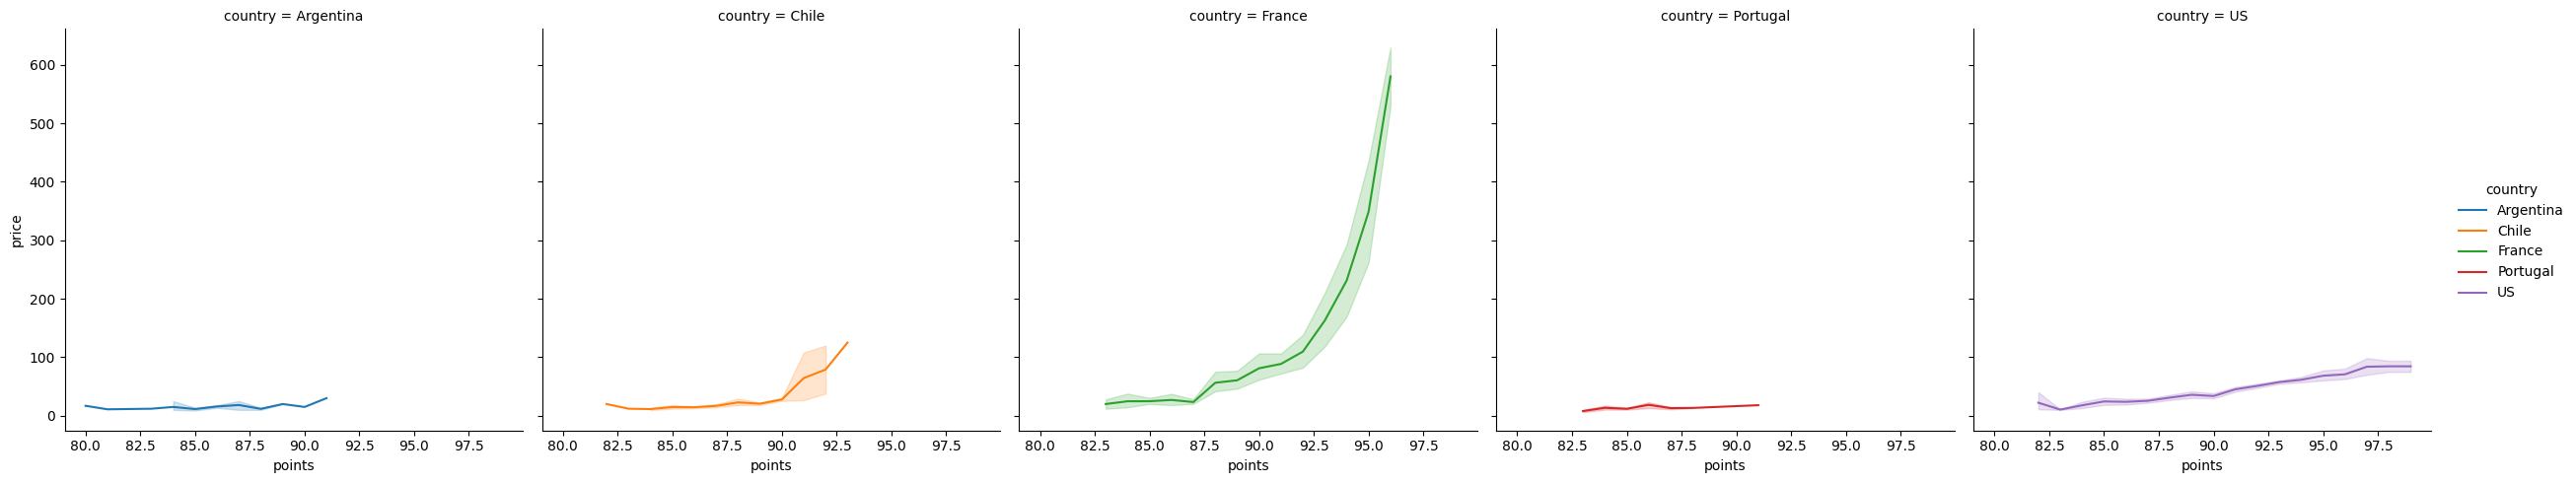

In [63]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=p_v)

#### &#9758; Observa las distribuciones por pares en función de la variedad de uva.

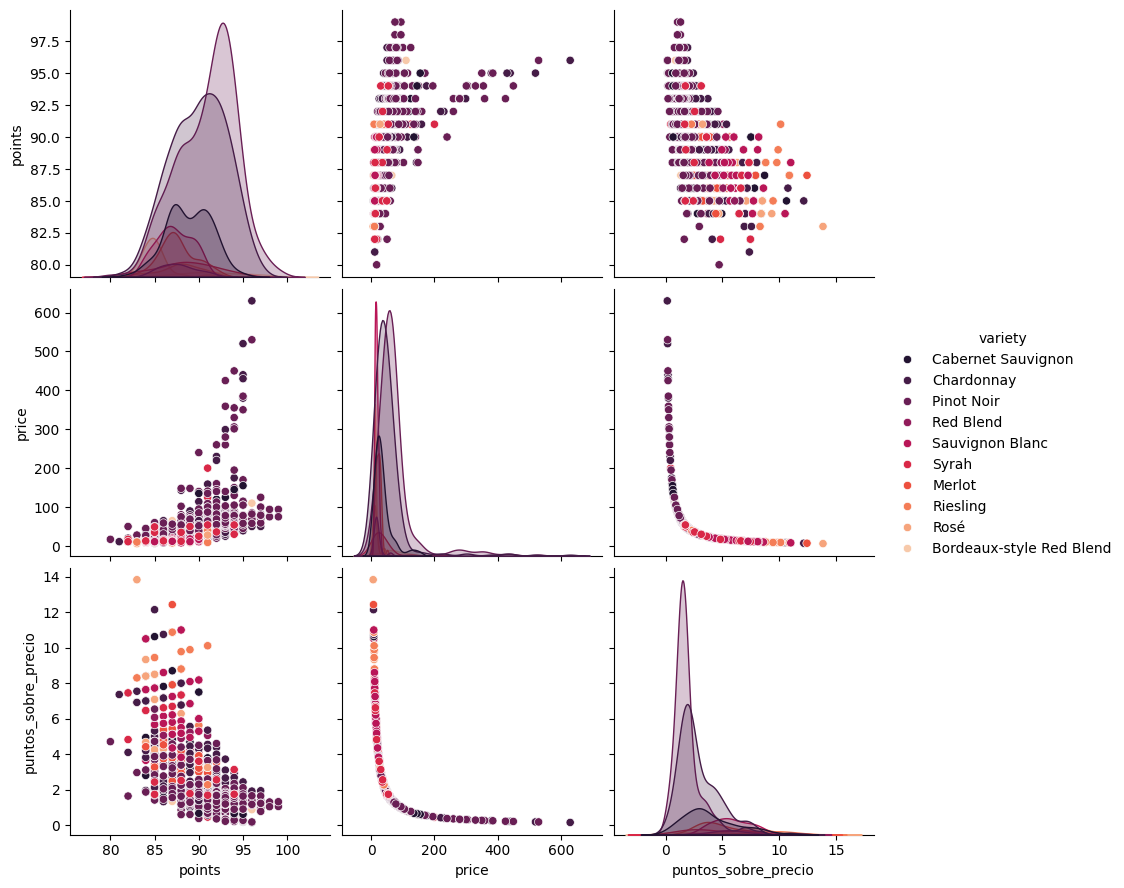

In [64]:
sns.pairplot(p_v, hue="variety",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en función del país.

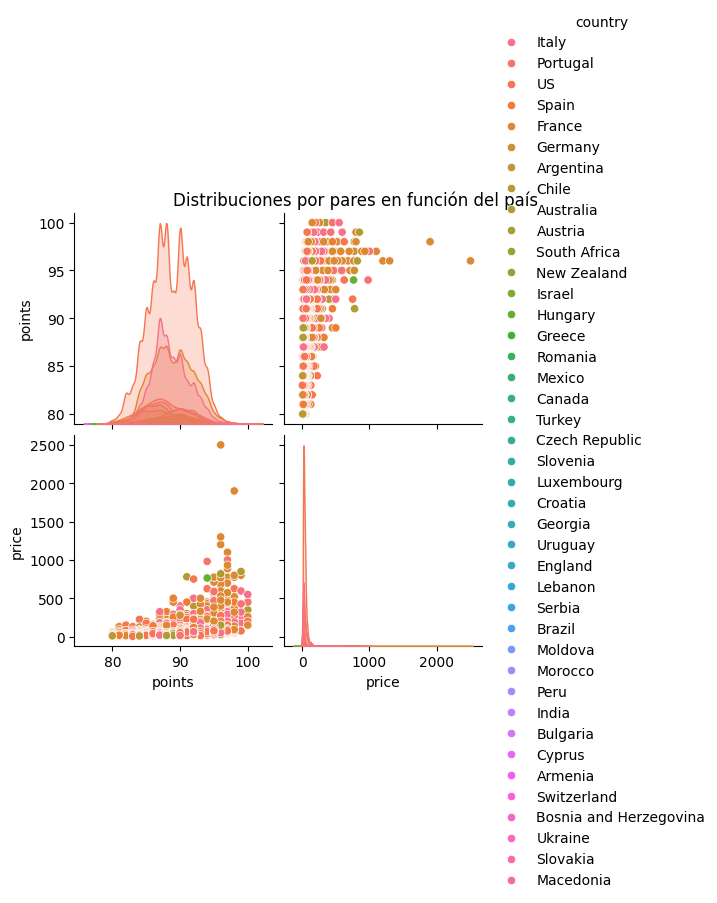

In [66]:
sns.pairplot(data=df, hue='country', vars=['points', 'price'])
plt.suptitle('Distribuciones por pares en función del país', y=1.02)
plt.show()


#### &#9758; Observa las distribuciones por pares en función de la bodega.

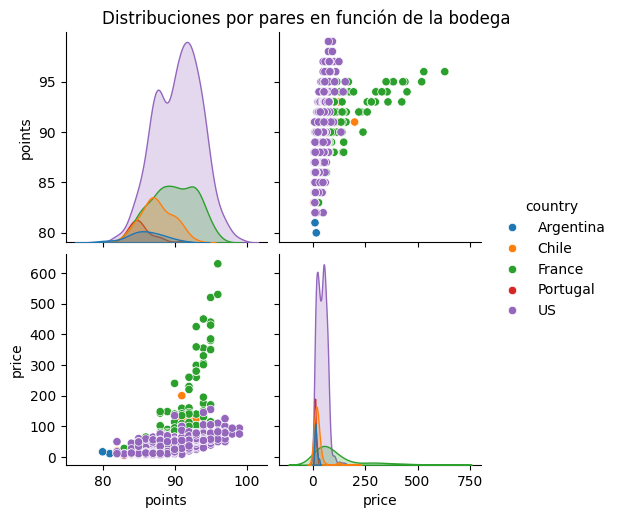

In [71]:
sns.pairplot(data=p_v, hue='country', vars=['points', 'price'])
plt.suptitle('Distribuciones por pares en función de la bodega', y=1.02)
plt.show()


#### &#9758; Observa las distribuciones (scatter) de precio por variedad de uva.

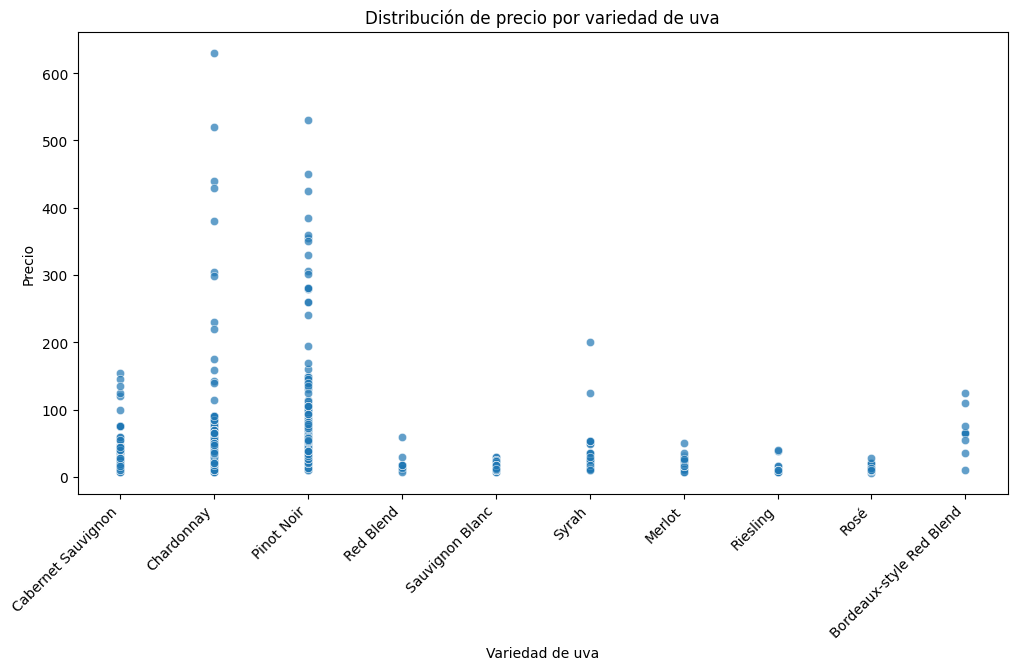

In [72]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=p_v, x='variety', y='price', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de precio por variedad de uva')
plt.xlabel('Variedad de uva')
plt.ylabel('Precio')
plt.show()



#### &#9758; Observa las distribuciones (scatter) de precio por bodega.

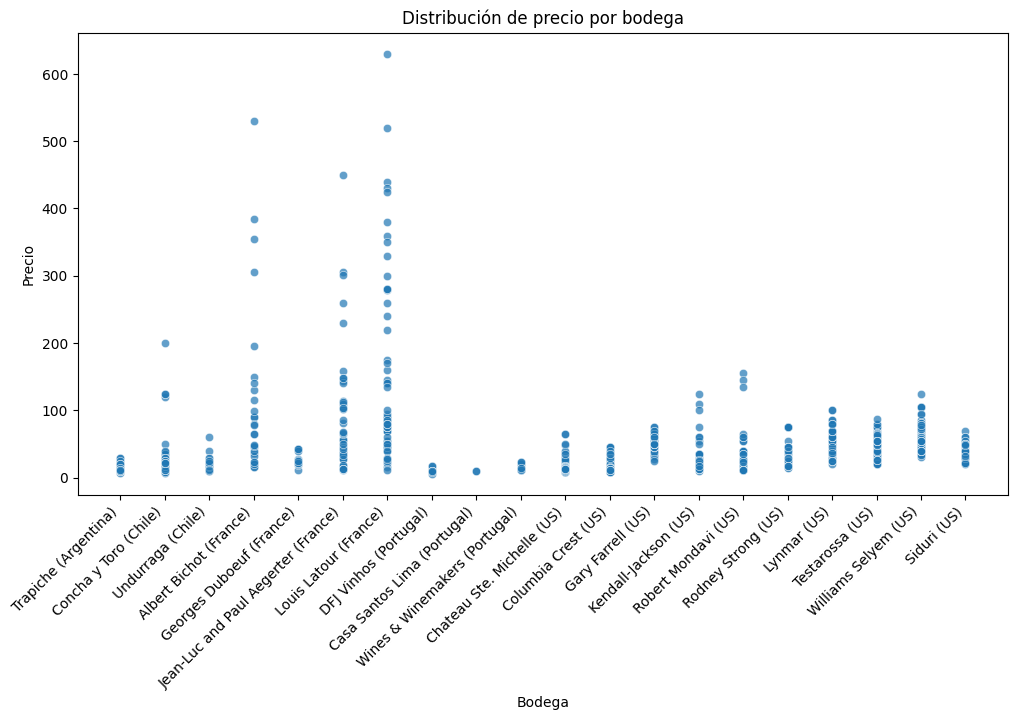

In [77]:
# Dispersión para precio por bodega
plt.figure(figsize=(12, 6))
sns.scatterplot(data=p_v, x='bodega_con_pais', y='price', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de precio por bodega')
plt.xlabel('Bodega')
plt.ylabel('Precio')
plt.show()


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.

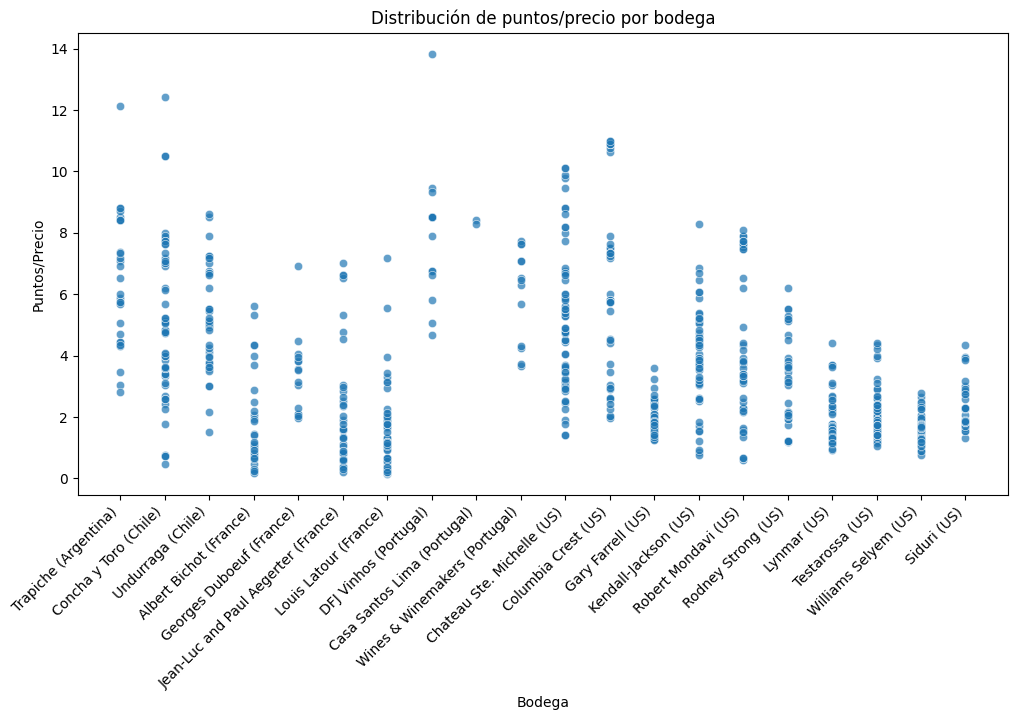

In [79]:
# Dispersión para puntos/precio por bodega
plt.figure(figsize=(12, 6))
sns.scatterplot(data=p_v, x='bodega_con_pais', y='puntos_sobre_precio', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de puntos/precio por bodega')
plt.xlabel('Bodega')
plt.ylabel('Puntos/Precio')
plt.show()


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por país.

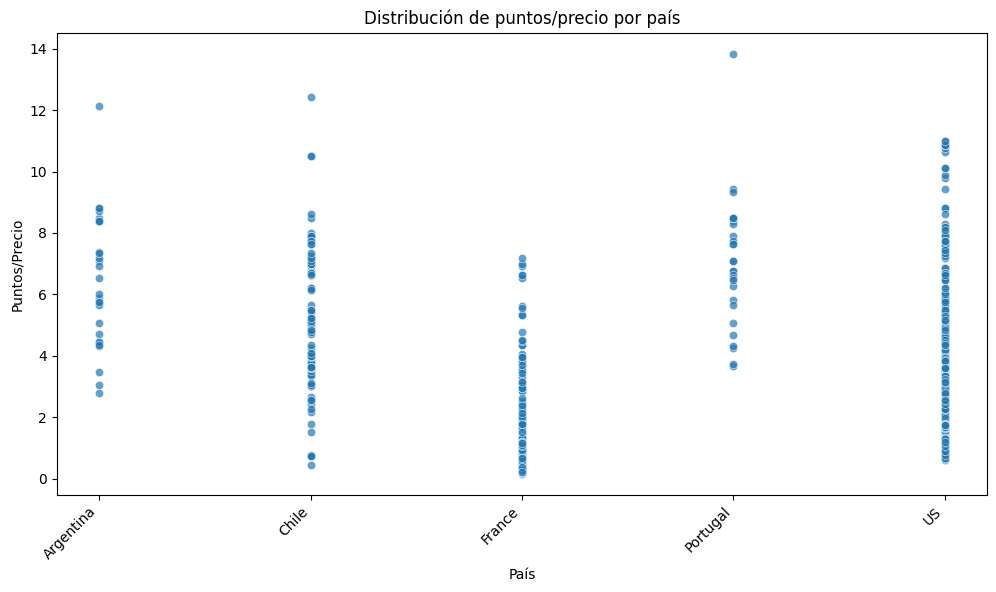

In [81]:
#Dispersión para puntos/precio por país
plt.figure(figsize=(12, 6))
sns.scatterplot(data=p_v, x='country', y='puntos_sobre_precio', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de puntos/precio por país')
plt.xlabel('País')
plt.ylabel('Puntos/Precio')
plt.show()



### __Agrega los datos de México a esta última tabla de información__

#### &#9758; Une la tabla de vinosMX a la tabla p_v
- Asegúrate de __no agregar__ la columna de descripción

In [96]:
if 'description' in vinosMX.columns:
    vinosMX.drop('description', axis=1, inplace=True)
df3 = pd.concat([p_v, vinosMX])
print(df3)


         country                       variety                winery  points  \
2141   Argentina            Cabernet Sauvignon  Trapiche (Argentina)      84   
3056   Argentina            Cabernet Sauvignon  Trapiche (Argentina)      88   
15948  Argentina            Cabernet Sauvignon  Trapiche (Argentina)      90   
24370  Argentina            Cabernet Sauvignon  Trapiche (Argentina)      88   
30928  Argentina            Cabernet Sauvignon  Trapiche (Argentina)      91   
...          ...                           ...                   ...     ...   
25        Mexico                     Red Blend        Viñas de Garza      92   
26        Mexico                    Chardonnay            L.A. Cetto      84   
27        Mexico  Sauvignon Blanc-Chenin Blanc    Hacienda La Lomita      86   
28        Mexico      Bordeaux-style Red Blend             La Lomita      88   
29        Mexico     Cabernet Sauvignon-Merlot           Monte Xanic      86   

       price  puntos_sobre_precio  
214

#### &#9758; Calcula los valores de points/price para los vinos de México
- TIP: Usa el método apply sobre `df3[['points','price','points/price']]`

In [97]:
vinos_mexico = df3[df3['country'] == 'Mexico']
vinos_mexico['points/price'] = vinos_mexico.apply(lambda row: row['points'] / row['price'], axis=1)
print(vinos_mexico)


   country                       variety  \
0   Mexico                      Nebbiolo   
1   Mexico               Sauvignon Blanc   
2   Mexico            Cabernet Sauvignon   
3   Mexico                      Nebbiolo   
4   Mexico                  Petite Sirah   
5   Mexico                          Rosé   
6   Mexico                Cabernet Franc   
7   Mexico               Sauvignon Blanc   
8   Mexico                     Red Blend   
9   Mexico                     Red Blend   
10  Mexico                          Rosé   
11  Mexico                        Merlot   
12  Mexico                      Muscatel   
13  Mexico                     Red Blend   
14  Mexico                     Red Blend   
15  Mexico               Sauvignon Blanc   
16  Mexico                     Red Blend   
17  Mexico                    Chardonnay   
18  Mexico                     Red Blend   
19  Mexico                    Chardonnay   
20  Mexico                      Nebbiolo   
21  Mexico                      

<ipython-input-97-50b6b2039954>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vinos_mexico['points/price'] = vinos_mexico.apply(lambda row: row['points'] / row['price'], axis=1)


#### &#9758; Observa la relación puntos-precio por país

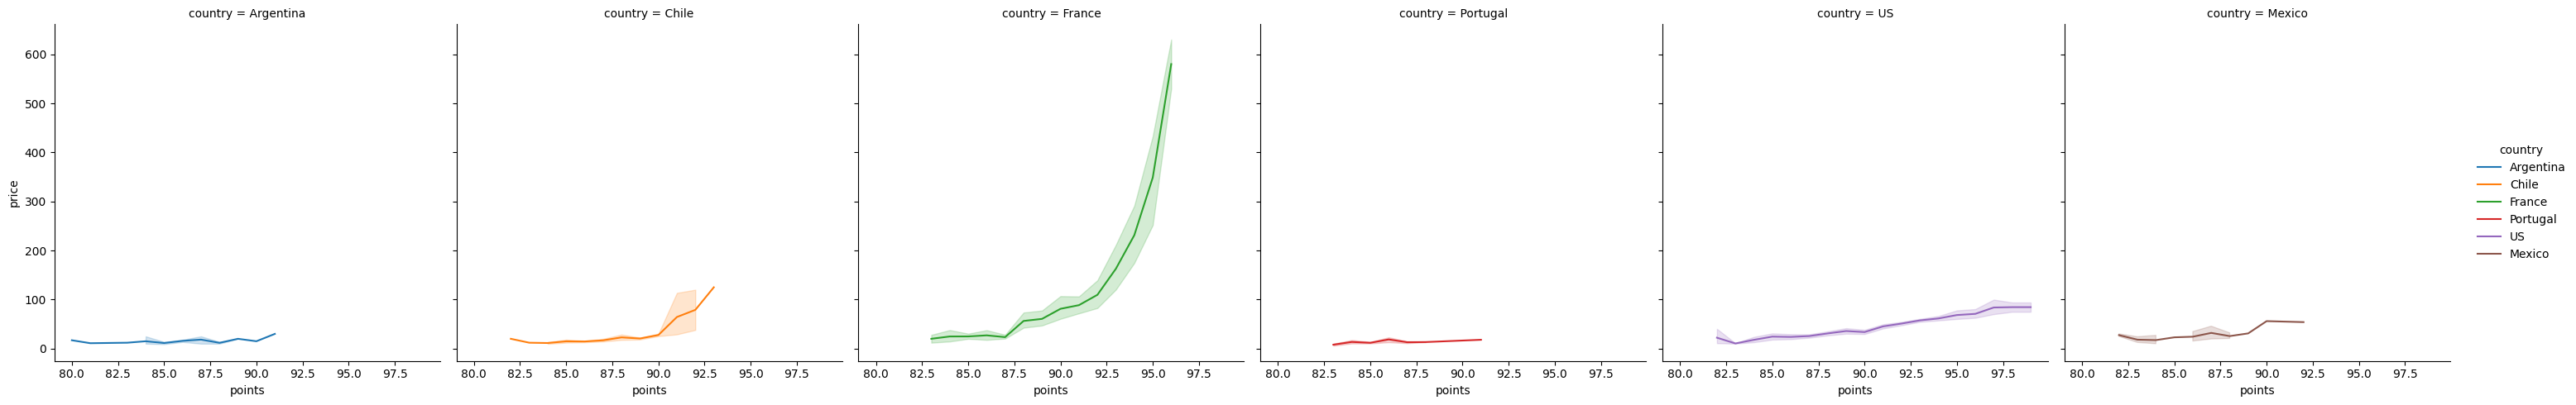

In [98]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=df3)

#### &#9758; Observa las distribuciones por pares en función del país.
- Construye una tabla auxiliar "mx_top", donde los datos de México (en df3) aparezcan al final de la tabla mx_top.

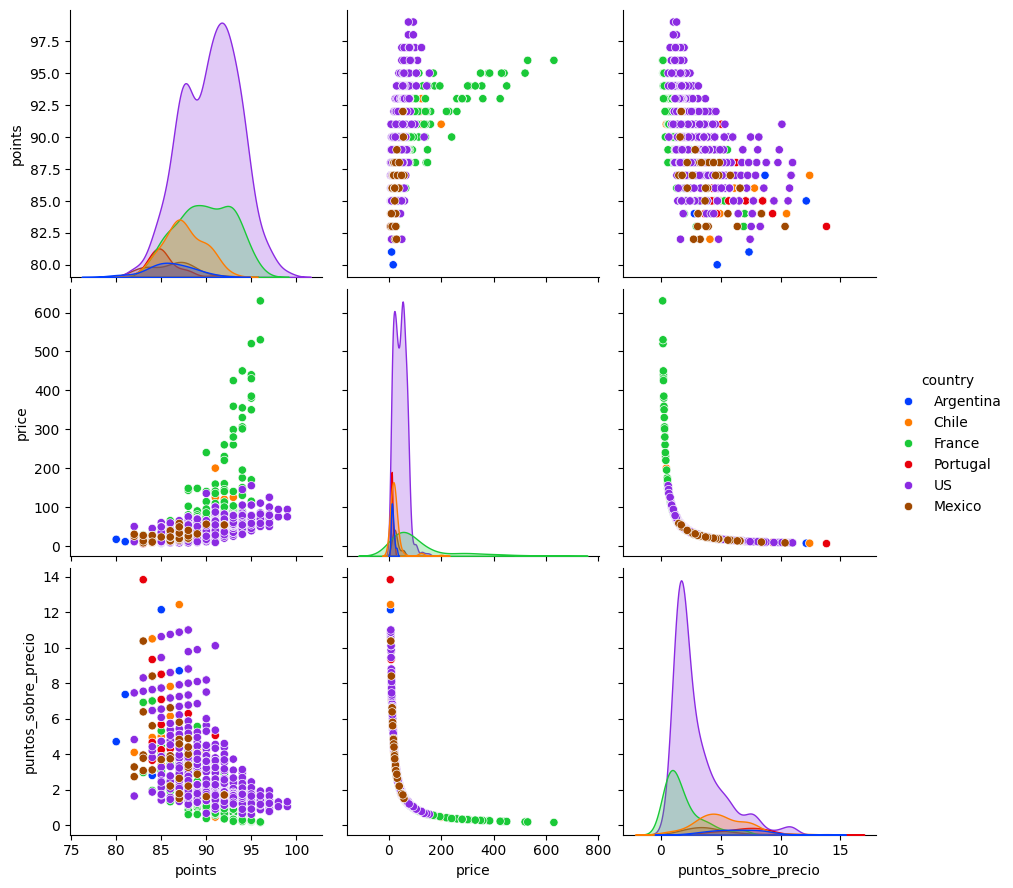

In [101]:
datos_mexico = df3[df3['country'] == 'Mexico']
datos_resto = df3[df3['country'] != 'Mexico']
mx_top = pd.concat([datos_resto, datos_mexico])
sns.pairplot(mx_top, hue="country", height=3, palette='bright')
plt.show()


#### &#9758; Observa las distribuciones (scatter) de puntos por país.

<ipython-input-102-a75306f8387d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Argentina'),
  Text(1, 0, 'Chile'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Portugal'),
  Text(4, 0, 'US'),
  Text(5, 0, 'Mexico')])

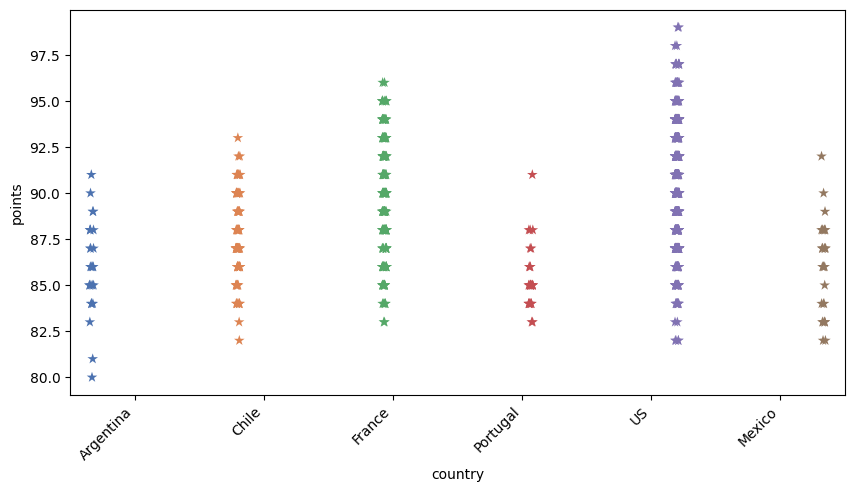

In [102]:
plt.figure(figsize=(10,5))
sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de precios por bodega.

<ipython-input-103-d31340acea07>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="winery", y="price", data=df3,dodge=True,palette='rocket',marker='*',size=8)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Trapiche (Argentina)'),
  Text(1, 0, 'Concha y Toro (Chile)'),
  Text(2, 0, 'Undurraga (Chile)'),
  Text(3, 0, 'Albert Bichot (France)'),
  Text(4, 0, 'Georges Duboeuf (France)'),
  Text(5, 0, 'Jean-Luc and Paul Aegerter (France)'),
  Text(6, 0, 'Louis Latour (France)'),
  Text(7, 0, 'DFJ Vinhos (Portugal)'),
  Text(8, 0, 'Casa Santos Lima (Portugal)'),
  Text(9, 0, 'Wines & Winemakers (Portugal)'),
  Text(10, 0, 'Chateau Ste. Michelle (US)'),
  Text(11, 0, 'Columbia Crest (US)'),
  Text(12, 0, 'Gary Farrell (US)'),
  Text(13, 0, 'Kendall-Jackson (US)'),
  Text(14, 0, 'Robert Mondavi (US)'),
  Text(15, 0, 'Rodney Strong (US)'),
  Text(16, 0, 'Lynmar (US)'),
  Text(17, 0, 'Testarossa (US)'),
  Text(18, 0, 'Williams Selyem (US)'),
  Text(19, 0, 'Siduri (US)'),
  Text(20,

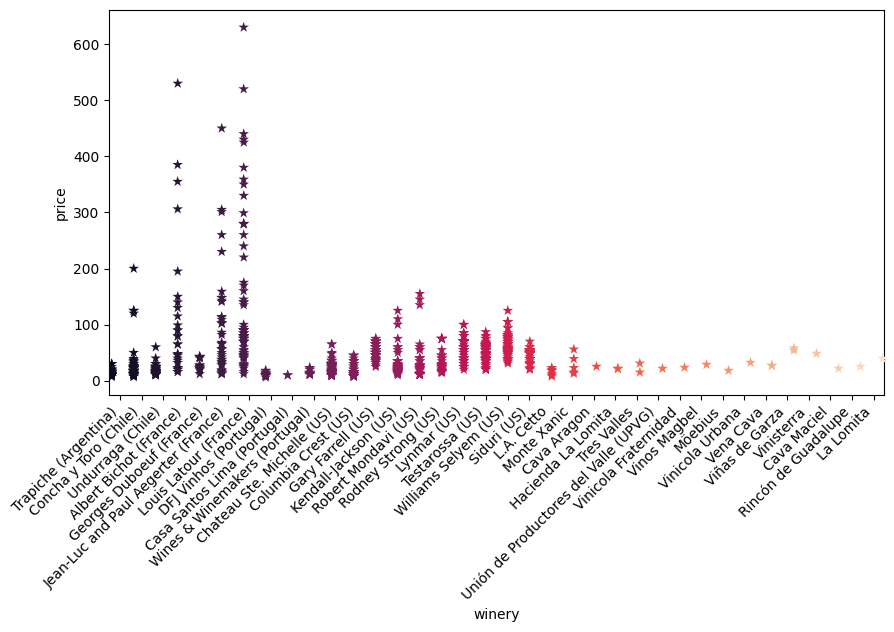

In [103]:
plt.figure(figsize=(10,5))
sns.stripplot(x="winery", y="price", data=df3,dodge=True,palette='rocket',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.
- Dibuja una línea que marque el promedio de todos los datos
- Dibuja marcas ubicadando los valores promedio por cada bodega (TIP: usa `groupby` sobre país y bodega para calcular primero los valores promedio)

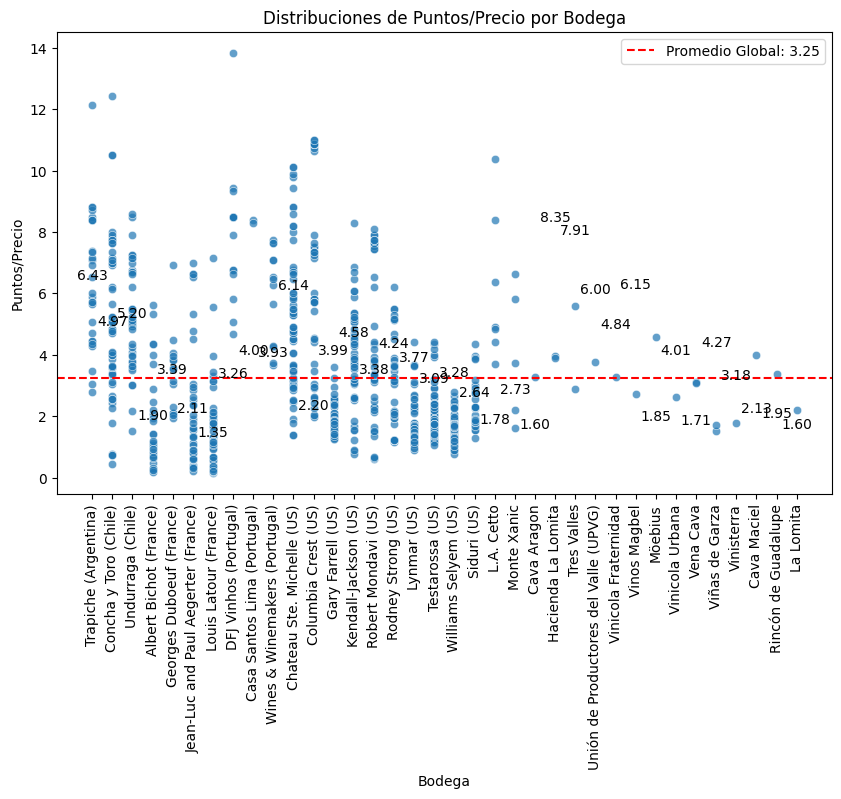

In [108]:
prom_por_bodega = df3.groupby(['country', 'winery'])['puntos_sobre_precio'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='winery', y='puntos_sobre_precio', alpha=0.7)
prom_global = df3['puntos_sobre_precio'].mean()
plt.axhline(y=prom_global, color='r', linestyle='--', label=f'Promedio Global: {prom_global:.2f}')

# Dibujar marcas para los valores promedio por cada bodega
for i, row in prom_por_bodega.iterrows():
    plt.text(i, row['puntos_sobre_precio'], f"{row['puntos_sobre_precio']:.2f}", color='black', ha='center')

plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor visualización
plt.xlabel("Bodega")
plt.ylabel("Puntos/Precio")
plt.title("Distribuciones de Puntos/Precio por Bodega")
plt.legend()
plt.show()


☞ Si consideramos la proporción de los países con mejor relación puntos/precio, ¿cómo queda México?
Usa un gráfico de pastel


In [121]:
# Calcular la proporción de estos países con respecto al total
proporcion_paises = top_mejores_paises / top_mejores_paises.sum()

# Mostrar la proporción de los países con mejor relación puntos/precio
print(proporcion_paises)


country
Ukraine                   0.240867
Romania                   0.219072
Bulgaria                  0.188985
India                     0.183533
Bosnia and Herzegovina    0.167543
Name: points/price, dtype: float64


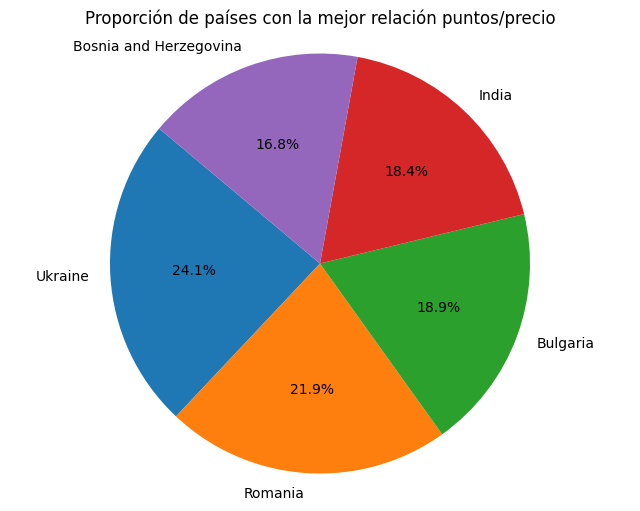

In [123]:
proporcion_paises = top_mejores_paises / top_mejores_paises.sum()
plt.figure(figsize=(8, 6))
plt.pie(proporcion_paises, labels=proporcion_paises.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de países con la mejor relación puntos/precio')
plt.axis('equal')
plt.show()


(-1.099999204556341,
 1.0999949548341907,
 -1.099999309292674,
 1.0999979698429416)

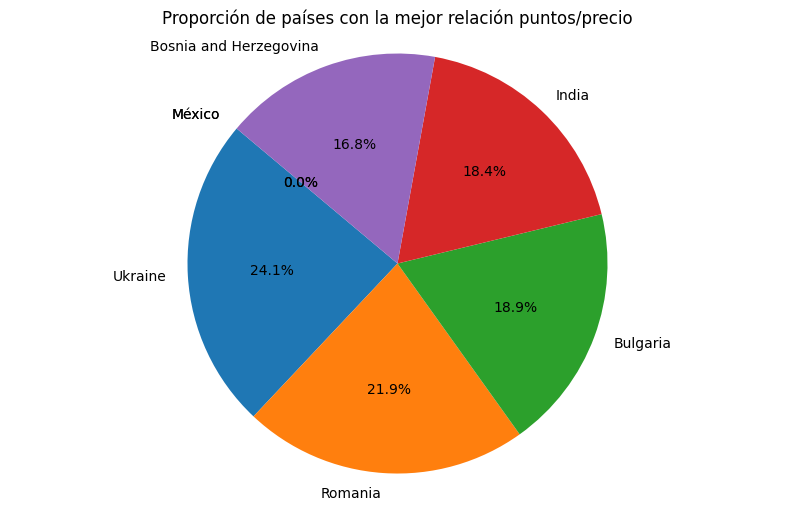

In [125]:
import matplotlib.pyplot as plt

# Calcular la proporción de los países con mejor relación puntos/precio
proporcion_paises = top_mejores_paises / top_mejores_paises.sum()

# Si México no está en top_mejores_paises, agregamos su relación puntos/precio como 0
if 'Mexico' not in top_mejores_paises.index:
    top_mejores_paises['Mexico'] = 0

# Calcular la proporción de México
proporcion_mexico = top_mejores_paises['Mexico'] / top_mejores_paises.sum()

# Crear un gráfico de pastel
plt.figure(figsize=(10, 6))
plt.pie(proporcion_paises.values.tolist() + [proporcion_mexico], labels=top_mejores_paises.index.tolist() + ['México'], autopct='%1.1f%%', startangle=140)
plt.title('Proporción de países con la mejor relación puntos/precio')
plt.axis('equal')  # Asegurar que el gráfico sea
